In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
#     'text.usetex' : True,
#     'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
#     'text.usetex' : True,
#     'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
# path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/"
path_to_folder = "../Haptics_new/Haptics_X/"

subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['../Haptics_new/Haptics_X/sub1_Controller copy/',
 '../Haptics_new/Haptics_X/sub1_Glove_haptics copy/',
 '../Haptics_new/Haptics_X/sub1_Glove_nohaptics copy/',
 '../Haptics_new/Haptics_X/sub2_Controller/',
 '../Haptics_new/Haptics_X/sub2_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub2_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub3_Controller/',
 '../Haptics_new/Haptics_X/sub3_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub3_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub4_Controller/',
 '../Haptics_new/Haptics_X/sub4_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub4_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub5_Controller/',
 '../Haptics_new/Haptics_X/sub5_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub5_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub6_Controller/',
 '../Haptics_new/Haptics_X/sub6_Glove_haptics/',
 '../Haptics_new/Haptics_X/sub6_Glove_nohaptics/',
 '../Haptics_new/Haptics_X/sub7_Controller copy/',
 '../Haptics_new/Haptics_X/sub7_Glove_haptics copy/',
 '..

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

../Haptics_new/Haptics_X/sub1_Controller copy/
../Haptics_new/Haptics_X/sub1_Glove_haptics copy/
../Haptics_new/Haptics_X/sub1_Glove_nohaptics copy/
../Haptics_new/Haptics_X/sub2_Controller/
../Haptics_new/Haptics_X/sub2_Glove_haptics/
../Haptics_new/Haptics_X/sub2_Glove_nohaptics/
../Haptics_new/Haptics_X/sub3_Controller/
../Haptics_new/Haptics_X/sub3_Glove_haptics/
../Haptics_new/Haptics_X/sub3_Glove_nohaptics/
../Haptics_new/Haptics_X/sub4_Controller/
../Haptics_new/Haptics_X/sub4_Glove_haptics/
../Haptics_new/Haptics_X/sub4_Glove_nohaptics/
../Haptics_new/Haptics_X/sub5_Controller/
../Haptics_new/Haptics_X/sub5_Glove_haptics/
../Haptics_new/Haptics_X/sub5_Glove_nohaptics/
../Haptics_new/Haptics_X/sub6_Controller/
../Haptics_new/Haptics_X/sub6_Glove_haptics/
../Haptics_new/Haptics_X/sub6_Glove_nohaptics/
../Haptics_new/Haptics_X/sub7_Controller copy/
../Haptics_new/Haptics_X/sub7_Glove_haptics copy/
../Haptics_new/Haptics_X/sub7_Glove_nohaptics copy/
../Haptics_new/Haptics_X/sub8_Co

In [9]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Glove_haptics' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

In [10]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    c0 = np.array([0,0,0])/256
    c1 = np.array([150,0,0])/256
    c2 = np.array([0,0,100])/256
    c3 = np.array([0,100,0])/256

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4], ['Remote', 'Motion'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [11]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

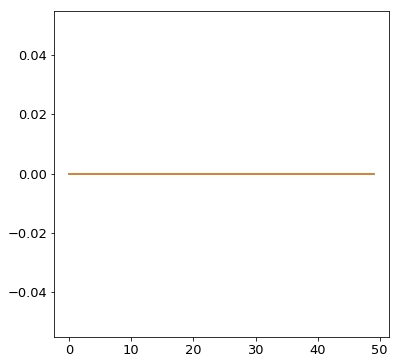

In [12]:
logs1 = logs.copy()

logs1['first remote'][0]['dronePositionFiltered.x'] = running_average(logs1['first remote'][0]['dronePosition.x'], 15)

plt.figure(figsize=(6,6))

plt.plot(logs1['first remote'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first remote'][0]['dronePositionFiltered.x'][0:50])

# Collision Analysis

In [13]:
os.getcwd()

'/Users/matteomacchini/Documents/github/Bidirectional_Interface/data_analysis_new/simulations'

In [14]:
coll_df = pd.read_csv('../Haptics_new/Bidir - haptics X collisions - Sheet1 copy.csv')
coll_df

,Index,Run,Subject,Interface,Collided
0,1,1,1,Motion,0
1,2,2,1,Motion,1
2,3,3,1,Motion,0
3,4,4,1,Motion,0
4,5,5,1,Motion,0
5,6,1,1,Remote,0
6,7,2,1,Remote,1
7,8,3,1,Remote,1
8,9,4,1,Remote,1
9,10,5,1,Remote,0


In [15]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
print(coll['motion'])
print(coll['remote'])

    Index  Run  Subject Interface  Collided
0       1    1        1    Motion         0
1       2    2        1    Motion         1
2       3    3        1    Motion         0
3       4    4        1    Motion         0
4       5    5        1    Motion         0
10     11    1        2    Motion         0
11     12    2        2    Motion         0
12     13    3        2    Motion         0
13     14    4        2    Motion         0
14     15    5        2    Motion         0
20     21    1        3    Motion         1
21     22    2        3    Motion         0
22     23    3        3    Motion         1
23     24    4        3    Motion         0
24     25    5        3    Motion         1
30     31    1        4    Motion         0
31     32    2        4    Motion         1
32     33    3        4    Motion         0
33     34    4        4    Motion         0
34     35    5        4    Motion         0
40     41    1        5    Motion         0
41     42    2        5    Motio


consider all runs

mean motion =  1.0
std motion =  0.8660254037844386
mean remote =  2.25
std remote =  1.299038105676658

total motion =  8
total remote =  18

p = 0.03699513696172581 !!!!!!

consider first runs

mean motion =  0.25
std motion =  0.4330127018922193
mean remote =  0.375
std remote =  0.4841229182759271

total motion =  2
total remote =  3

p = 0.6015081344405868

consider last runs

mean motion =  0.125
std motion =  0.33071891388307384
mean remote =  0.125
std remote =  0.33071891388307384

total motion =  1
total remote =  1

p = 1.0


Text(0.5, 1.0, 'Collisions - last run')

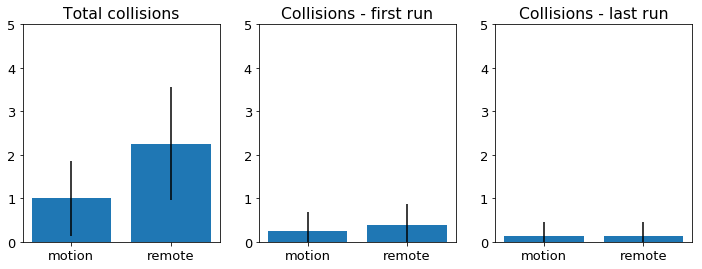

In [16]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

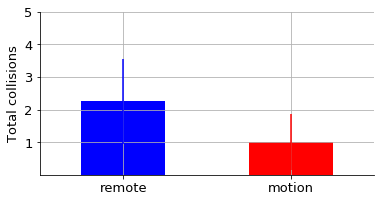

In [17]:

c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([1,2,3,4,5])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Approach wall Analysis

In [18]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [19]:
x_max = runHapticsAnalysis(comp_max_dist)

motion
[2.122805595397949, 2.2166364192962646, 2.236614465713501, 2.292959451675415, 2.391254425048828, 2.122805595397949, 2.2166364192962646, 2.236614465713501, 2.292959451675415, 2.391254425048828, 2.4389536380767822, 2.220491409301758, 2.540416955947876, 2.226597547531128, 2.4883811473846436, 2.2479584217071533, 2.4243648052215576, 2.0713884830474854, 2.340548276901245, 2.4011707305908203, 2.2544796466827393, 2.2213897705078125, 2.440469741821289, 2.2062902450561523, 2.2559120655059814, 2.4174914360046387, 2.178957462310791, 2.117490768432617, 2.221266984939575, 2.1515555381774902, 2.4389536380767822, 2.220491409301758, 2.540416955947876, 2.226597547531128, 2.4883811473846436, 2.2479584217071533, 2.4243648052215576, 2.0713884830474854, 2.340548276901245, 2.4011707305908203]
mean =  2.2946596801280976
std =  0.12671801855762455

remote
[1.0454010963439941, 1.4640271663665771, 1.5928618907928467, 2.5829100608825684, 1.5307704210281372, 2.3656351566314697, 2.4590678215026855, 2.1492285

In [20]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider


motion remote
p = 0.02745363053122479 !!!!!!


Text(0.5, 1.0, 'Distances')

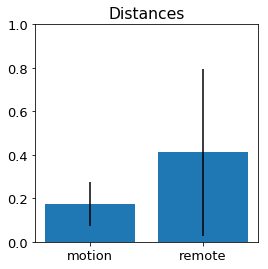

In [21]:
distances = {}

for i in interfaces:
    distances[i] = x_collision - np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1],
   [np.mean(distances['motion']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['remote'])])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

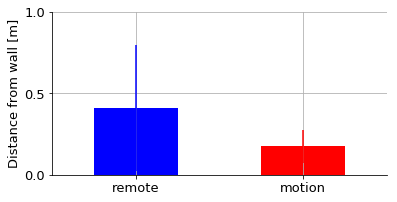

In [22]:
c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 2.5])
plt.ylabel('Distance from wall [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('distances_X.pdf', bbox_inches='tight')

<BarContainer object of 40 artists>

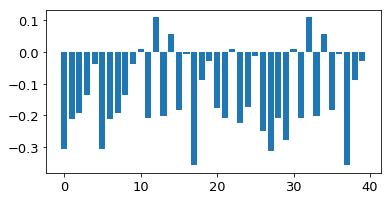

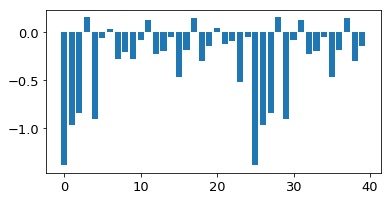

In [23]:
plt.bar(range(len(x_max['motion'])),np.array(x_max['motion']) - 2.43)
plt.figure()
plt.bar(range(len(x_max['remote'])),np.array(x_max['remote']) - 2.43)

## <span style="color:red">HERE RESULTS</span>